In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from IPython.display import display
import os

In [2]:

ruta = os.path.join(os.getcwd(), "..", "..", "data", "processed", "peleadores.parquet")
df = pd.read_parquet(ruta)
df.head()

,Peleador,Fecha,KD_A,SIG_STR_A,TD_PORC_A,SUB_ATT_A,REV_A,CTRL_A,TD_x_A,TD_y_A,...,STR_GROUND_y_A,Peleas,Puntos,Racha,Victorias_KO,Victorias_Sub,Victorias_Decision,Derrotas_KO,Derrotas_Sub,Derrotas_Decision
0,Laverne Clark,2000-09-22,0.250000,0.5700,0.250000,0.0,0.5,84.750000,0.500000,0.500000,...,8.500000,4,0.086517,0,2,0,1,0,1,0
1,Frank Caracci,1999-01-08,0.000000,0.0000,0.000000,1.0,0.0,0.000000,0.000000,2.000000,...,0.000000,1,0.000000,0,0,0,0,1,0,0
2,Pedro Rizzo,2003-11-21,0.461538,0.3500,0.102308,0.0,0.0,70.384615,0.153846,0.538462,...,5.076923,13,0.735237,2,6,0,2,2,0,3
3,Mark Coleman,2010-02-06,0.000000,0.4825,0.357500,0.0,0.0,239.750000,3.000000,6.000000,...,17.500000,4,0.000000,0,0,0,1,1,1,1
4,Mikey Burnett,1999-01-08,1.000000,0.3100,0.000000,1.0,0.0,0.000000,0.000000,0.000000,...,9.000000,1,0.048609,1,0,0,1,0,0,0


In [3]:
print("\nTipos de datos:")
print(df.dtypes.to_string())


Tipos de datos:
Peleador                      object
Fecha                 datetime64[ns]
KD_A                         float64
SIG_STR_A                    float64
TD_PORC_A                    float64
SUB_ATT_A                    float64
REV_A                        float64
CTRL_A                       float64
TD_x_A                       float64
TD_y_A                       float64
TOTAL_STR_x_A                float64
TOTAL_STR_y_A                float64
STR_HEAD_x_A                 float64
STR_HEAD_y_A                 float64
STR_BODY_x_A                 float64
STR_BODY_y_A                 float64
STR_LEG_x_A                  float64
STR_LEG_y_A                  float64
STR_DISTANCE_x_A             float64
STR_DISTANCE_y_A             float64
STR_CLINCH_x_A               float64
STR_CLINCH_y_A               float64
STR_GROUND_x_A               float64
STR_GROUND_y_A               float64
Peleas                         int64
Puntos                       float64
Racha                

SUB (Sumisiones): Tiene una distribución altamente sesgada a la derecha, con la mayoría de los valores concentrados 
en los niveles más bajos y algunos valores extremadamente altos, 
lo que indica que la mayoría de los peleadores consiguen pocas sumisiones en sus carreras.

In [ ]:


print("\nResumen estadístico de columnas numéricas:")
pd.set_option('display.max_columns', None)
print(df.describe(include='all'))


Resumen estadístico de columnas numéricas:
             Peleador                       Fecha         KD_A    SIG_STR_A  \
count            2459                        2459  2459.000000  2459.000000   
unique           2459                         NaN          NaN          NaN   
top     Torrez Finney                         NaN          NaN          NaN   
freq                1                         NaN          NaN          NaN   
mean              NaN  2017-11-02 22:32:09.564864     0.164077     0.439297   
min               NaN         1999-01-08 00:00:00     0.000000     0.000000   
25%               NaN         2013-05-25 00:00:00     0.000000     0.373095   
50%               NaN         2018-12-01 00:00:00     0.000000     0.446000   
75%               NaN         2024-05-04 00:00:00     0.272727     0.510000   
max               NaN         2025-04-12 00:00:00     2.000000     1.000000   
std               NaN                         NaN     0.236216     0.124781   

       

In [5]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['KD_A', 'SIG_STR_A', 'TD_PORC_A', 'SUB_ATT_A', 'REV_A', 'CTRL_A',
       'TD_x_A', 'TD_y_A', 'TOTAL_STR_x_A', 'TOTAL_STR_y_A', 'STR_HEAD_x_A',
       'STR_HEAD_y_A', 'STR_BODY_x_A', 'STR_BODY_y_A', 'STR_LEG_x_A',
       'STR_LEG_y_A', 'STR_DISTANCE_x_A', 'STR_DISTANCE_y_A', 'STR_CLINCH_x_A',
       'STR_CLINCH_y_A', 'STR_GROUND_x_A', 'STR_GROUND_y_A', 'Peleas',
       'Puntos', 'Racha', 'Victorias_KO', 'Victorias_Sub',
       'Victorias_Decision', 'Derrotas_KO', 'Derrotas_Sub',
       'Derrotas_Decision'],
      dtype='object')


Distribución sesgada a la derecha: La mayoría de los valores están concentrados 
en la parte baja de la escala, mientras que hay una gran cantidad de valores atípicos (outliers) hacia 
la derecha. Esto indica que la mayoría de los peleadores conectan pocos golpes significativos, 
pero hay algunos casos excepcionales donde se conectan muchos. Para mejorar eso deberíamos estudiar realizar ciertas transformaciones.

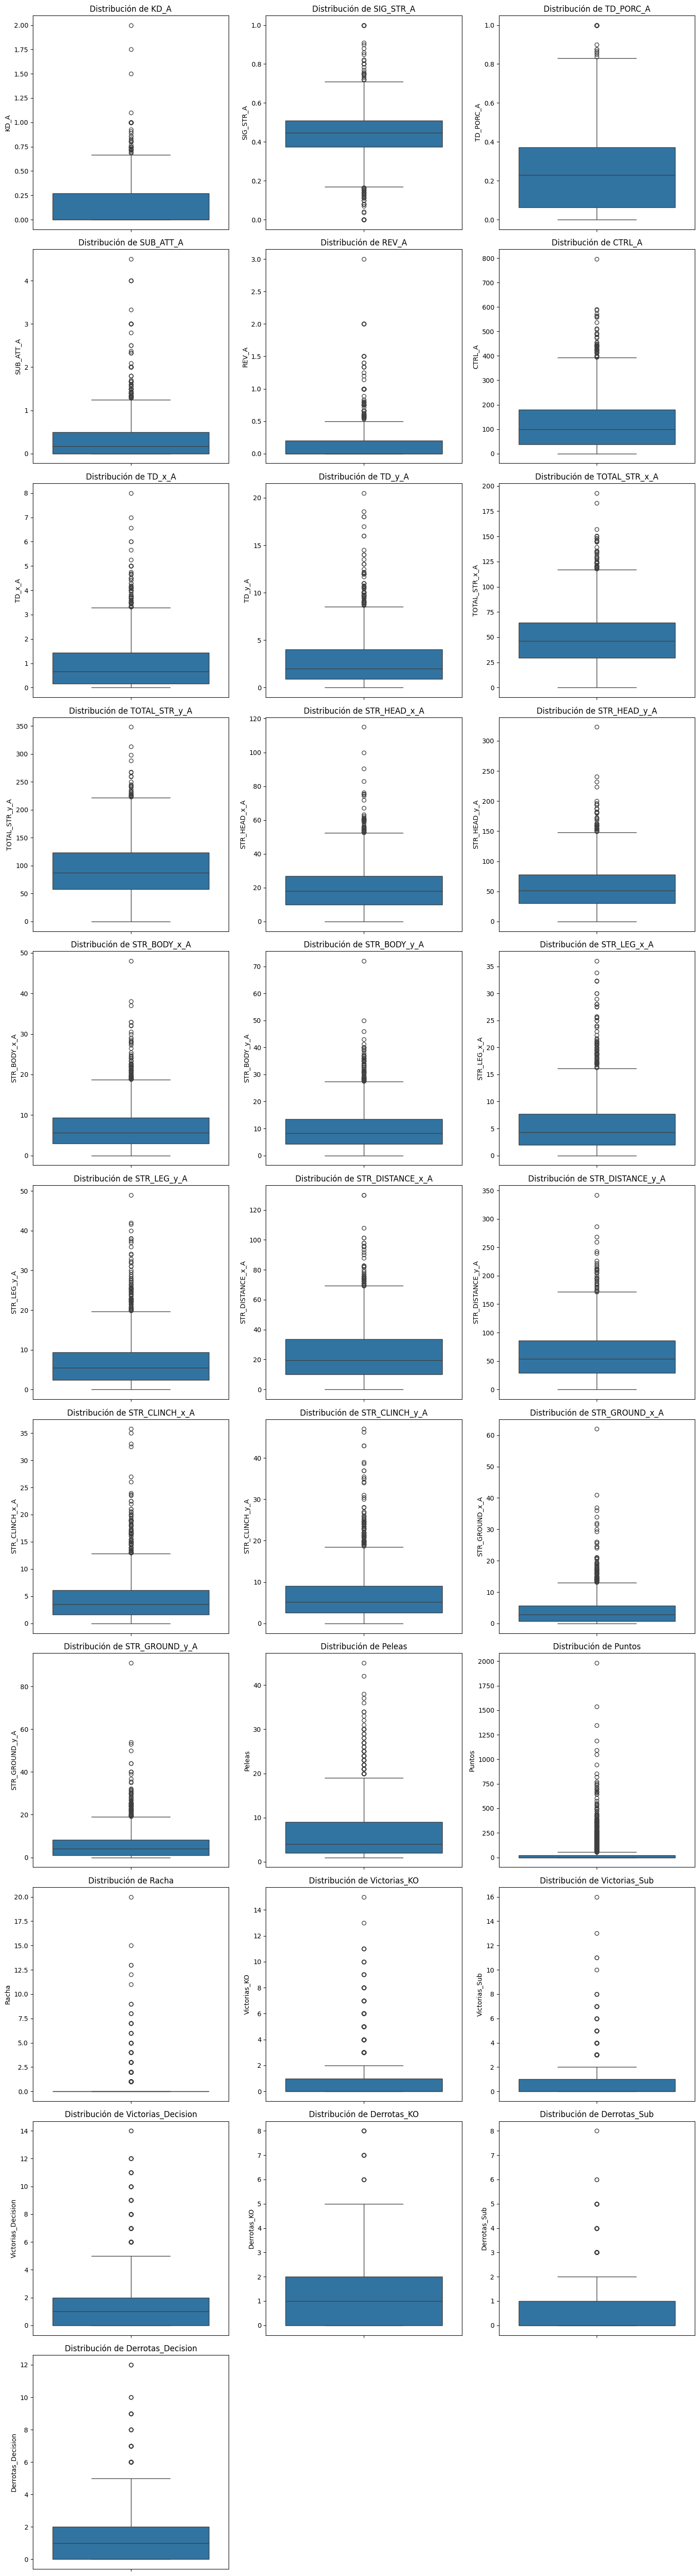

'Distribución sesgada a la derecha: La mayoría de los valores están concentrados \nen la parte baja de la escala, mientras que hay una gran cantidad de valores atípicos (outliers) hacia \nla derecha. Esto indica que la mayoría de los peleadores conectan pocos golpes significativos, \npero hay algunos casos excepcionales donde se conectan muchos. Para mejorar eso deberíamos estudiar realizar ciertas transformaciones.'

In [ ]:
# Número de columnas
cols = 3

# Calcula el número de filas necesarias para los gráficos
rows = (len(numerical_columns) + cols - 1) // cols  # Redondeo hacia arriba

# Crear la figura
plt.figure(figsize=(5 * cols, 5 * rows))

# Crear los subgráficos
for i, col in enumerate(numerical_columns):
    plt.subplot(rows, cols, i + 1)  # Definir filas y columnas
    sns.boxplot(y=df[col])  # Usar 'y' para boxplot en vertical
    plt.title(f"Distribución de {col}")

# Ajustar la disposición para que no se sobrepongan
plt.tight_layout()

# Mostrar la figura
plt.show()


In [7]:
# Identificación de valores atípicos usando IQR
outliers = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]

# Mostrar las columnas con sus respectivos outliers
for col, outlier_values in outliers.items():
    print(f"{col} tiene {len(outlier_values)} outliers")
    print(outlier_values.head(5))  # Muestra solo los primeros 5 valores atípicos para cada columna



KD_A tiene 86 outliers
4     1.000000
32    0.818182
43    1.000000
45    1.000000
60    1.000000
Name: KD_A, dtype: float64
SIG_STR_A tiene 100 outliers
1     0.00
9     0.15
27    0.00
31    0.00
33    0.80
Name: SIG_STR_A, dtype: float64
TD_PORC_A tiene 43 outliers
9     1.0
14    1.0
35    1.0
45    1.0
64    1.0
Name: TD_PORC_A, dtype: float64
SUB_ATT_A tiene 115 outliers
15    2.0
21    3.0
35    2.0
56    2.0
61    2.0
Name: SUB_ATT_A, dtype: float64
REV_A tiene 150 outliers
14    1.000000
15    1.000000
44    1.000000
47    0.555556
66    0.666667
Name: REV_A, dtype: float64
CTRL_A tiene 46 outliers
74     447.000000
86     509.000000
93     564.000000
95     587.000000
107    436.916667
Name: CTRL_A, dtype: float64
TD_x_A tiene 80 outliers
107    4.166667
120    3.333333
158    4.000000
170    4.076923
181    4.090909
Name: TD_x_A, dtype: float64
TD_y_A tiene 86 outliers
80     18.000000
107     9.416667
138    10.000000
146    12.000000
163     9.000000
Name: TD_y_A, dtype: f

Como vemos en los histogramas las variables no siguen distribuciones normales
y predomina, como ya habíamos visto con los boxplots las colas hacía la derecha. Intentaremos
utilizar todos los datos ya que no parecen errores de la página y en caso de que sea un problema para el 
modelo eliminaremos algunos valores atípicos.

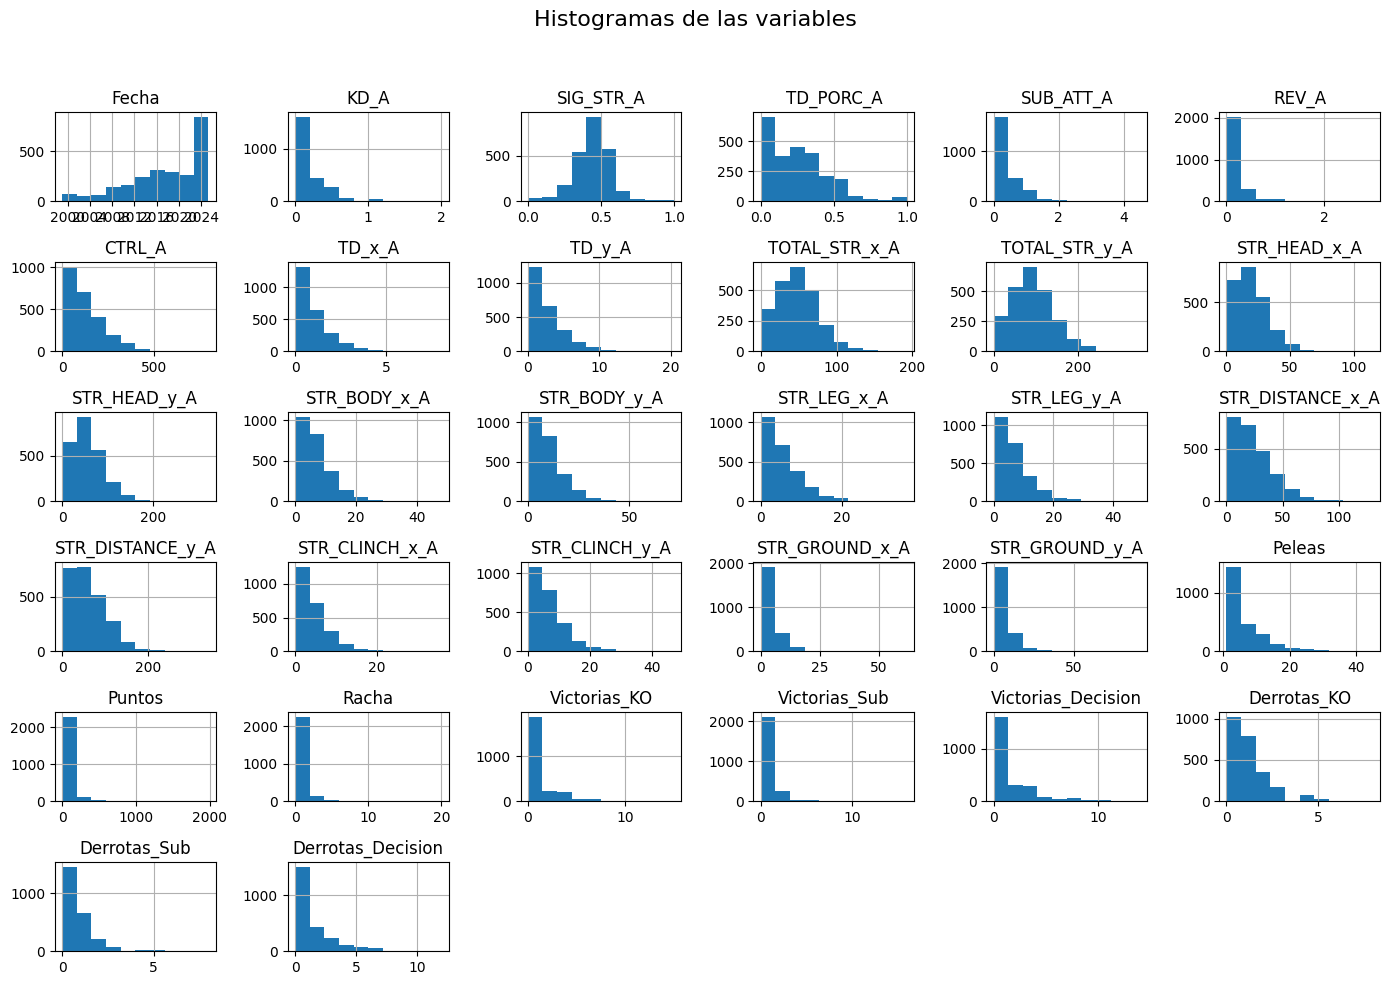

'Como vemos en los histogramas las variables no siguen distribuciones normales\ny predomina, como ya habíamos visto con los boxplots las colas hacía la derecha. Intentaremos\nutilizar todos los datos ya que no parecen errores de la página y en caso de que sea un problema para el \nmodelo eliminaremos algunos valores atípicos.'

In [ ]:
df.hist(figsize=(14, 10))
plt.suptitle("Histogramas de las variables", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [9]:
# Calcular el Z-score para todas las columnas numéricas
z_scores = df[numerical_columns].apply(zscore)

# Identificar valores con Z-score mayor a 3 o menor a -3
outliers_z = (z_scores.abs() > 3)

# Mostrar cuántos outliers hay en cada columna
outliers_count = outliers_z.sum()
print("\nNúmero de outliers detectados con Z-score:")
print(outliers_count[outliers_count > 0])


Número de outliers detectados con Z-score:
KD_A                  57
SIG_STR_A             44
TD_PORC_A             39
SUB_ATT_A             45
REV_A                 82
CTRL_A                28
TD_x_A                41
TD_y_A                34
TOTAL_STR_x_A         19
TOTAL_STR_y_A         12
STR_HEAD_x_A          24
STR_HEAD_y_A          21
STR_BODY_x_A          30
STR_BODY_y_A          37
STR_LEG_x_A           38
STR_LEG_y_A           41
STR_DISTANCE_x_A      23
STR_DISTANCE_y_A      26
STR_CLINCH_x_A        43
STR_CLINCH_y_A        40
STR_GROUND_x_A        35
STR_GROUND_y_A        38
Peleas                45
Puntos                45
Racha                 40
Victorias_KO          57
Victorias_Sub         51
Victorias_Decision    44
Derrotas_KO           48
Derrotas_Sub          44
Derrotas_Decision     41
dtype: int64
